In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the dataset from the Excel file
df = pd.read_excel("D:/Major Project/News_Dataset.xlsx")

# Drop the 'Name' column
df = df.drop(columns=['Sno', 'F0', 'Duration', 'MFCC', 'Formants',  'Gender'])

# Separate features and target variable
X = df.drop(columns=['Target_Label'])
y = df['Target_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.iloc[:, :-1]

data_test = pd.DataFrame(X_test[:], columns=X_test.columns[:]) 

X_test = X_test.iloc[:, :-1]

In [4]:
# Initialize classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train classifiers
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)
dt_predictions = dt_classifier.predict(X_test)

In [5]:
#Rf Predictions

output_df = pd.DataFrame({'Name': data_test['Name'], 'Prediction': rf_predictions.flatten()})

print(output_df)

                  Name  Prediction
27     M_surprise_male           0
40            H_sound7           1
26         M_hope_male           0
43            M_sound8           1
24  M_extremely_female           0
37          M_god_male           0
12    H_extremely_male           1
19       H_rain_female           1
4             H_sound5           1
25         M_nice_male           0


In [6]:
#Dt Predictions

output_df = pd.DataFrame({'Name': data_test['Name'], 'Prediction': dt_predictions.flatten()})

print(output_df)

                  Name  Prediction
27     M_surprise_male           0
40            H_sound7           1
26         M_hope_male           0
43            M_sound8           1
24  M_extremely_female           0
37          M_god_male           0
12    H_extremely_male           1
19       H_rain_female           1
4             H_sound5           1
25         M_nice_male           0


In [7]:
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions))
print("Recall:", recall_score(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))

Random Forest Classifier Metrics:
Accuracy: 0.9
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889


In [8]:
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Precision:", precision_score(y_test, dt_predictions))
print("Recall:", recall_score(y_test, dt_predictions))
print("F1 Score:", f1_score(y_test, dt_predictions))

Decision Tree Classifier Metrics:
Accuracy: 0.9
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889


Random Forest Classifier Confusion Matrix:



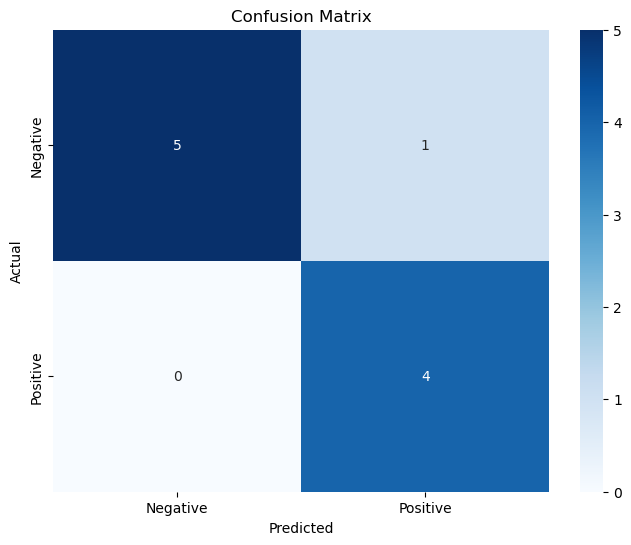

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Random Forest Classifier Confusion Matrix:")
print()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Classifier Confusion Matrix:



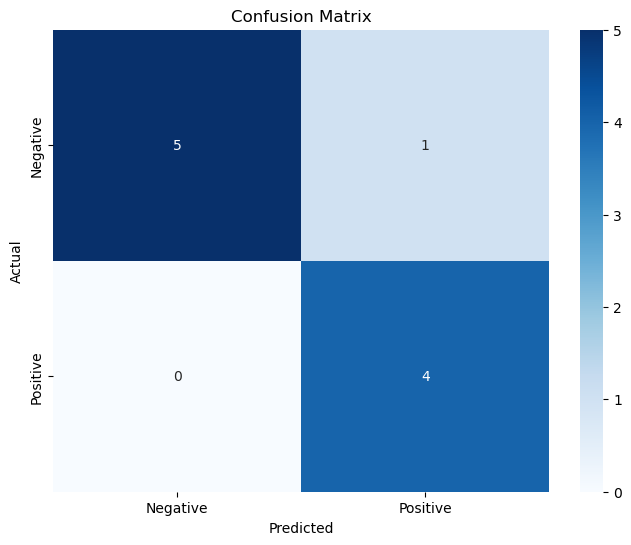

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Decision Tree Classifier Confusion Matrix:")
print()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Model Fitting

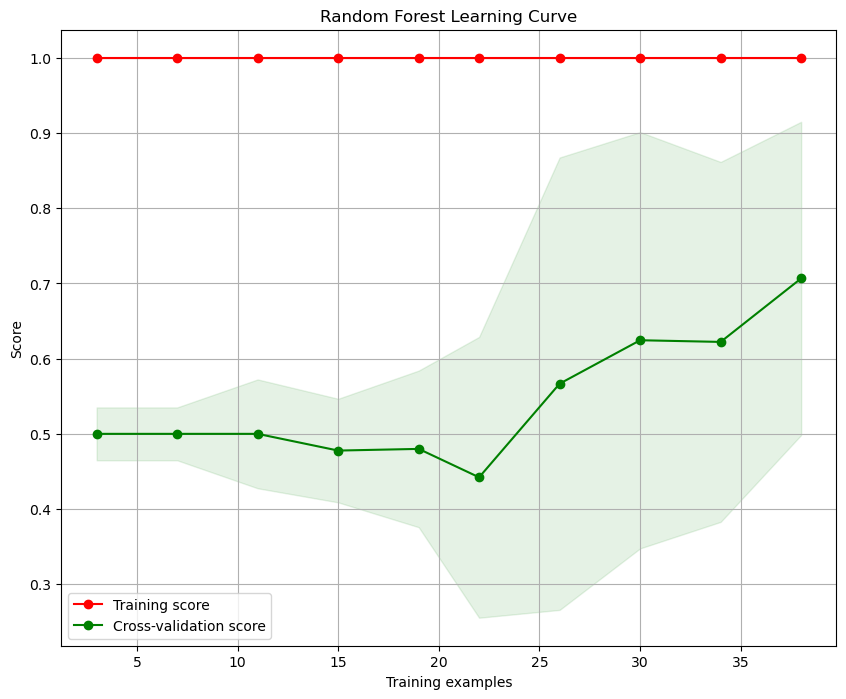

In [11]:
import numpy as np
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve and print fitting message
def plot_learning_curve_with_message(estimator, title, X, y, ylim=None, cv=None,
                                     n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    
    X = X.iloc[:, :-1]
    plt.figure(figsize=(10, 8))  # Increase the figure size
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Determine fitting message
    fitting_message = ""
#     if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
#         fitting_message = "Correctly Fitted"
#     elif train_scores_mean[-1] > test_scores_mean[-1]:
#         fitting_message = "Overfitted"
#     else:
#         fitting_message = "Underfitted"

    # Add fitting message as text annotation
    plt.annotate(fitting_message,
                 xy=(0.5, -0.1), xytext=(0, -30),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='center', va='top', fontsize=12, color='blue')

    return plt

# Plot the learning curve with fitting message
plot_learning_curve_with_message(rf_classifier, "Random Forest Learning Curve", X, y, cv=5)
plt.show()


# Decision Tree Model Fitting

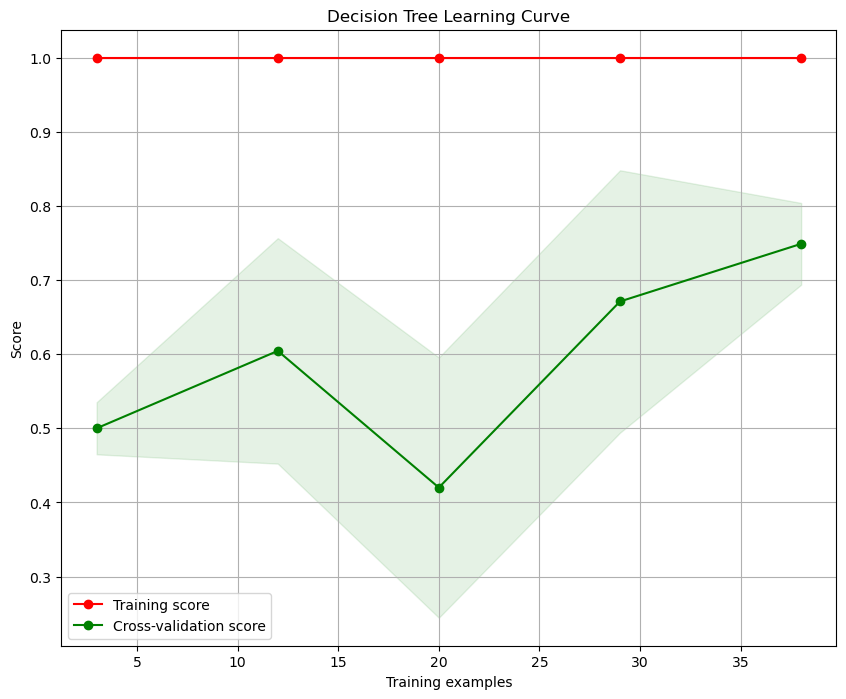

In [12]:
import numpy as np
from sklearn.model_selection import learning_curve

# Create a function to plot the learning curve and print fitting message
def plot_learning_curve_with_message(estimator, title, X, y, ylim=None, cv=None,
                                     n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    X = X.iloc[:, :-1]
    plt.figure(figsize=(10, 8))  # Increase the figure size
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

    # Determine fitting message
    fitting_message = ""
#     if abs(train_scores_mean[-1] - test_scores_mean[-1]) < 0.05:
#         fitting_message = "Correctly Fitted"
#     elif train_scores_mean[-1] > test_scores_mean[-1]:
#         fitting_message = "Overfitted"
#     else:
#         fitting_message = "Underfitted"

    # Add fitting message as text annotation
    plt.annotate(fitting_message,
                 xy=(0.5, -0.1), xytext=(0, -30),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='center', va='top', fontsize=12, color='blue')

    return plt

# Plot the learning curve with fitting message
plot_learning_curve_with_message(dt_classifier, "Decision Tree Learning Curve", X, y, cv=5)
plt.show()
